# Machine Learning in Marketing 2020/21
## Assignment 4 1+2

In [23]:
# set working directory
%cd C:/Users/Christopher/Documents/MLiM/Assignment 4/

C:\Users\Christopher\Documents\MLiM\Assignment 4


In [24]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [25]:
baskets = pd.read_parquet("baskets.parquet")

In [26]:
baskets.head(10)

,shopper,product,basket
0,0,51,00000000
1,0,113,00000000
2,0,154,00000000
3,0,165,00000000
4,0,185,00000000
5,0,253,00000000
6,0,266,00000000
7,1,31,00000001
8,1,67,00000001
9,1,248,00000001


In [27]:
baskets_origin = baskets.copy()

In [67]:

baskets = baskets_origin.copy()
# baskets.info()
# baskets["product"] = baskets["product"].values.astype(str)
# baskets["product"] = baskets["product"].astype(str)
# baskets.head()
baskets = baskets.groupby(by="basket").agg({'shopper': max, 'product':lambda x: list(x)}).reset_index(drop=False)
baskets = baskets.rename(columns={"product": "products"})
baskets.head(10)

,basket,shopper,products
0,00000000,0,"[51, 113, 154, 165, 185, 253, 266]"
1,00000001,1,"[31, 67, 248, 255]"
2,00000002,2,"[13, 24, 69, 93, 132, 138, 189, 216, 274]"
3,00000003,3,"[21, 39, 116, 174, 206, 226]"
4,00000004,4,"[20, 53, 80, 158, 192, 204, 213, 238]"
5,00000005,5,"[17, 74, 81, 134]"
6,00000006,6,"[4, 53, 99, 114, 128, 137, 192, 260]"
7,00000007,7,"[23, 201, 214, 261]"
8,00000008,8,"[55, 60, 185, 201, 225]"
9,00000009,9,"[52, 86, 107, 121, 156, 195, 211, 279, 297]"


In [81]:
# [ str(i) for i in baskets["products"][0]]+
product_list = list(baskets["products"])
product_list = [[str(i) for i in line] for line in baskets["products"]]
product_list[0:10]
# baskets.head()

[['51', '113', '154', '165', '185', '253', '266'],
 ['31', '67', '248', '255'],
 ['13', '24', '69', '93', '132', '138', '189', '216', '274'],
 ['21', '39', '116', '174', '206', '226'],
 ['20', '53', '80', '158', '192', '204', '213', '238'],
 ['17', '74', '81', '134'],
 ['4', '53', '99', '114', '128', '137', '192', '260'],
 ['23', '201', '214', '261'],
 ['55', '60', '185', '201', '225'],
 ['52', '86', '107', '121', '156', '195', '211', '279', '297']]

In [77]:
baskets.head()

,basket,shopper,products,product_list
0,00000000,0,"[51, 113, 154, 165, 185, 253, 266]","[51, 113, 154, 165, 185, 253, 266]"
1,00000001,1,"[31, 67, 248, 255]","[31, 67, 248, 255]"
2,00000002,2,"[13, 24, 69, 93, 132, 138, 189, 216, 274]","[13, 24, 69, 93, 132, 138, 189, 216, 274]"
3,00000003,3,"[21, 39, 116, 174, 206, 226]","[21, 39, 116, 174, 206, 226]"
4,00000004,4,"[20, 53, 80, 158, 192, 204, 213, 238]","[20, 53, 80, 158, 192, 204, 213, 238]"


In [16]:
!pip install gensim

  Created wheel for smart-open: filename=smart_open-4.1.0-py3-none-any.whl size=106210 sha256=b1987188aa111b57682ab0818392c293c78511b1acd1c700832afb4618de6143
  Stored in directory: c:\users\christopher\appdata\local\pip\cache\wheels\74\33\8e\37e22f50ce94856f37b3e23a93c648c194aa8d5a546083d09a
Successfully built smart-open
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [82]:
import gensim
from gensim.models.phrases import Phrases

bigram_model = gensim.models.Phrases(product_list, min_count=100) #runs for 1-2 minutes

In [83]:
# show all bigrams
bigram_model.vocab

defaultdict(int,
            {b'51': 17231,
             b'113': 20047,
             b'51_113': 175,
             b'154': 19489,
             b'113_154': 264,
             b'165': 28777,
             b'154_165': 632,
             b'185': 16958,
             b'165_185': 514,
             b'253': 20566,
             b'185_253': 93,
             b'266': 19822,
             b'253_266': 879,
             b'31': 17551,
             b'67': 23604,
             b'31_67': 409,
             b'248': 17994,
             b'67_248': 10,
             b'255': 17994,
             b'248_255': 716,
             b'13': 23080,
             b'24': 19275,
             b'13_24': 286,
             b'69': 23203,
             b'24_69': 225,
             b'93': 24082,
             b'69_93': 443,
             b'132': 17268,
             b'93_132': 316,
             b'138': 24469,
             b'132_138': 647,
             b'189': 16456,
             b'138_189': 152,
             b'216': 18826,
             b'189_21

In [84]:
# print progress

from gensim.models.callbacks import CallbackAny2Vec
class EpochLogger(CallbackAny2Vec):
  """Print progress of Word2Vec training to console"""

  def __init__(self):
    self.epoch = 0

  def on_epoch_begin(self, model):
    print("Epoch #{} start".format(self.epoch))

  def on_epoch_end(self, model):
    print("Epoch #{} end".format(self.epoch))
    self.epoch += 1

In [87]:
# train W2V model with 200 dimensions

from gensim.models import Word2Vec    # one and a half hours of computation

epoch_logger = EpochLogger()

w2v_model = Word2Vec(product_list, 
                 min_count=30, 
                 window=5,    
                 iter=50, # 100    
                 size=50, # 50, 100, 150, 200 
                 workers=4,    
                 callbacks=[epoch_logger])

Epoch #0 start
Epoch #0 end
Epoch #1 start
Epoch #1 end
Epoch #2 start
Epoch #2 end
Epoch #3 start
Epoch #3 end
Epoch #4 start
Epoch #4 end
Epoch #5 start
Epoch #5 end
Epoch #6 start
Epoch #6 end
Epoch #7 start
Epoch #7 end
Epoch #8 start
Epoch #8 end
Epoch #9 start
Epoch #9 end
Epoch #10 start
Epoch #10 end
Epoch #11 start
Epoch #11 end
Epoch #12 start
Epoch #12 end
Epoch #13 start
Epoch #13 end
Epoch #14 start
Epoch #14 end
Epoch #15 start
Epoch #15 end
Epoch #16 start
Epoch #16 end
Epoch #17 start
Epoch #17 end
Epoch #18 start
Epoch #18 end
Epoch #19 start
Epoch #19 end
Epoch #20 start
Epoch #20 end
Epoch #21 start
Epoch #21 end
Epoch #22 start
Epoch #22 end
Epoch #23 start
Epoch #23 end
Epoch #24 start
Epoch #24 end
Epoch #25 start
Epoch #25 end
Epoch #26 start
Epoch #26 end
Epoch #27 start
Epoch #27 end
Epoch #28 start
Epoch #28 end
Epoch #29 start
Epoch #29 end
Epoch #30 start
Epoch #30 end
Epoch #31 start
Epoch #31 end
Epoch #32 start
Epoch #32 end
Epoch #33 start
Epoch #33 end


In [88]:
w2v_model.wv["51"]

array([ 2.6236892 ,  0.50186986, -1.9902244 , -1.4276088 , -0.9521793 ,
       -0.01363123,  2.2401948 , -4.381383  , -0.19012173, -0.29695943,
       -2.7071772 , -2.7655828 , -2.0533664 ,  0.2715858 , -0.03514324,
        1.568933  , -1.3051308 ,  1.435958  , -3.9883046 ,  2.3749607 ,
        0.41769156, -0.11596354,  0.86225647,  4.7735753 ,  0.96155363,
       -1.8824003 ,  1.6816261 ,  4.6621904 , -1.2589663 ,  0.9995198 ,
       -0.6815222 ,  1.7477782 ,  3.7806337 , -2.8467212 ,  1.8746629 ,
        2.3955474 ,  0.8065931 , -3.4153163 , -1.3423092 , -2.9061642 ,
        1.9802055 ,  1.7701594 ,  0.01211983, -2.1664023 , -2.7037292 ,
       -0.20557939, -0.6608066 ,  2.2776635 ,  3.5594873 , -1.6660067 ],
      dtype=float32)

In [91]:
w2v_model.wv.most_similar("51")

[('55', 0.9951486587524414),
 ('45', 0.99106764793396),
 ('57', 0.9894126653671265),
 ('50', 0.9891116619110107),
 ('56', 0.9870998859405518),
 ('53', 0.9870754480361938),
 ('52', 0.9853380918502808),
 ('54', 0.9841853380203247),
 ('46', 0.9841407537460327),
 ('58', 0.98387610912323)]

In [122]:
print(w2v_model.wv.similarity("51", "0"))

0.739133


In [99]:
print(w2v_model.doesnt_match(["51", "50", "55", "100"]))

100


In [127]:
# define key words and get top 10 similar words with their embeddings

keys = [str(x) for x in list(range(0,261,20))]
keys

embedding_clusters = []
word_clusters = []
for word in keys:
  if word in w2v_model.wv.vocab:
    embeddings = []
    words = []
    for similar_word, _ in w2v_model.most_similar(word, topn=5):
        words.append(similar_word)
        embeddings.append(w2v_model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [131]:
# train the TSNE model and transform the embeddings into 2D

from sklearn.manifold import TSNE
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32) 
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

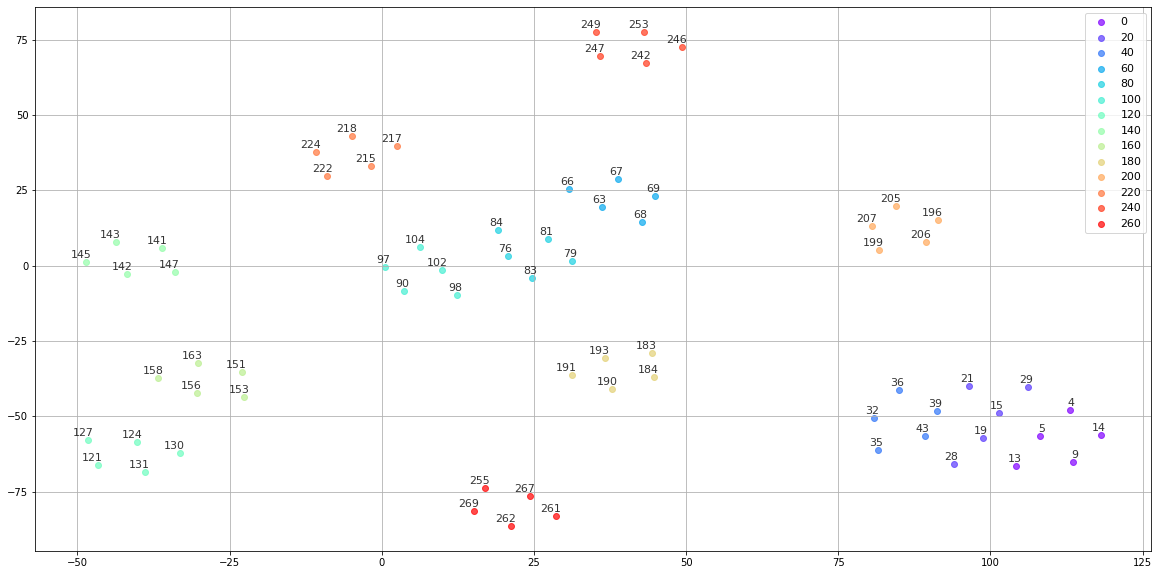

In [132]:

import matplotlib.cm as cm

# surpress warning messages
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(20, 10))
    colors = cm.rainbow(np.linspace(0, 1, len(labels))) 
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.8, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=11)
    plt.legend(loc='upper right', frameon=True, fontsize=11)
    plt.grid(True)
    plt.show()


tsne_plot_similar_words(keys, embeddings_en_2d, word_clusters)